In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datasets import *
import func as f
import plot as show


ModuleNotFoundError: No module named 'datasets'

In [ ]:
# Get current working directory (cwd)
cwd = os.getcwd()
  
# Points to parent directory
ROOT_DIR = os.path.abspath(os.path.join(cwd, os.pardir))
DB_DIR = os.path.join(ROOT_DIR, 'database')
FMTD_DB_DIR = os.path.join(DB_DIR, 'formatted')

# Visualizing missing values (gaps in the data)

### Fill missing values are mandatare to a good data treatment. In this work, missing values may be have caused by:
1. Error in data during measurement
2. System crash, causing a reboot of a system
3. Lost of data during exchange to database

### First of all, we need to find theese gaps, that can be one missing value, or a sequence of missing values. Know the lenght of each gap in time series is important to choose the strategy to fill them later.
### To do this, we use find_holes() function, that group each gap sequency and put it on an list. This function return an list of gaps, where a gap is a missing value or a sequence.

## 1. Computer time series of Power 

In [ ]:
pc = db_computer.copy()

In [ ]:
all_gaps = f.find_holes(pc['Pwr'])

### Looking more closely, we can see that a series has a gap with 514 missing values in sequence, each hour has 30 measure data, 514/30 is approximately 17.13 consecutive hours of losed data.
### The serie has:
 - 1 gap with 711 missing values
 - 11 gaps with sizes in between 13~60 missing values
 - 546 gaps with sizes in between 1~9 missing values
### All in all, we the series has 558 gaps

In [ ]:
l = list()
for gap in all_gaps:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      514
3        6
2        6
5        4
6        4
4        3
11       2
41       2
14       2
8        2
9        1
13       1
15       1
19       1
21       1
26       1
27       1
32       1
33       1
34       1
7        1
60       1
711      1
dtype: int64

### Flattening the gaps list, we see the series has 1755 missing values


In [ ]:
all_gaps_flat = f.flatten_holes_list(all_gaps)

In [ ]:
len(all_gaps_flat)

1755

### Now we can create a 'Holes' column in dataframe, and fill the date of gap occurrence  with 0's, to be possible visualize the gaps on a graphic

In [ ]:
pc['Holes'] = np.NaN
pc['Holes'].loc[all_gaps_flat] = 0

### Now, we can visualize the entire series and his gaps

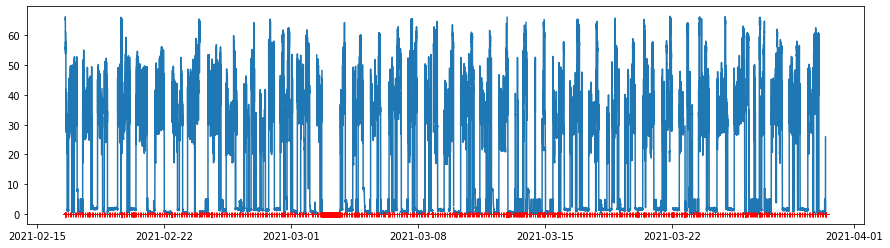

In [ ]:
#startdt = dt.datetime.strptime('2021/02/16 12:44:00','%Y/%m/%d %H:%M:%S')
#stopdt = dt.datetime.strptime('2021/02/18 00:00:00','%Y/%m/%d %H:%M:%S')
show.plot_gaps(pc['Pwr'], pc['Holes'])

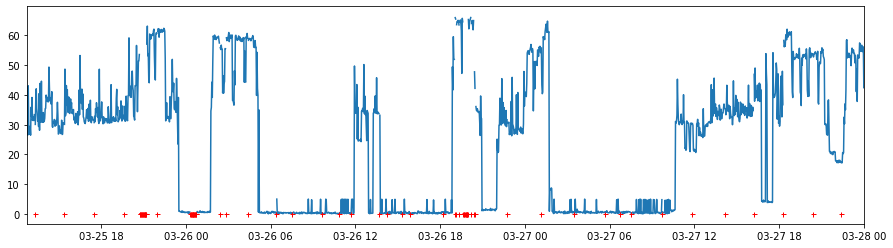

In [ ]:
startdt = dt.datetime.strptime('2021/03/25 12:44:00','%Y/%m/%d %H:%M:%S')
stopdt = dt.datetime.strptime('2021/03/28 00:00:00','%Y/%m/%d %H:%M:%S')
show.plot_gaps(pc['Pwr'], pc['Holes'], startdt, stopdt)

# Filling missing values (gaps in the data)

### To fill the gaps on series, we will use 2 strategies:
1. Use interpolation on small gaps
2. Use copy replace on large gaps

### To fill large gaps, we use the function fill_holes() that receive a treshold and fill gaps with lenght above the treshold, fill it with data from past date at same time of the day

## 1. Filling large holes ( size above 15 missing values )

In [ ]:
f.fill_holes(pc['Pwr'], all_gaps, 15)

### Finding remaing gaps

In [ ]:
small_gaps = f.find_holes(pc['Pwr'])
small_gaps_flat = f.flatten_holes_list(small_gaps)

In [ ]:
l2 = list()
for gap in small_gaps:
    l2.append(len(gap))
pd.Series(l2).value_counts()

1     531
2       6
3       6
5       4
6       4
4       3
8       2
11      2
14      2
7       1
9       1
13      1
dtype: int64

In [ ]:
# clean Holes column
pc['Holes'] = np.NaN
pc['Holes'].loc[small_gaps_flat] = 0

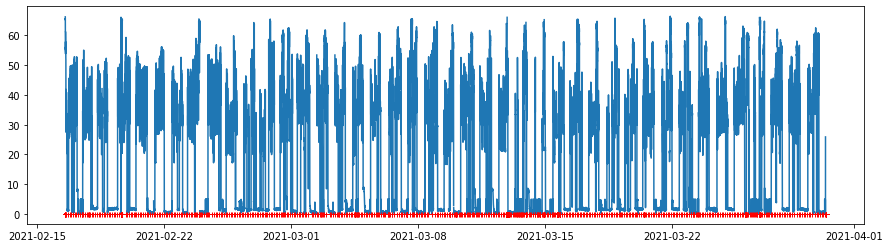

In [ ]:
show.plot_gaps(pc['Pwr'], pc['Holes'])

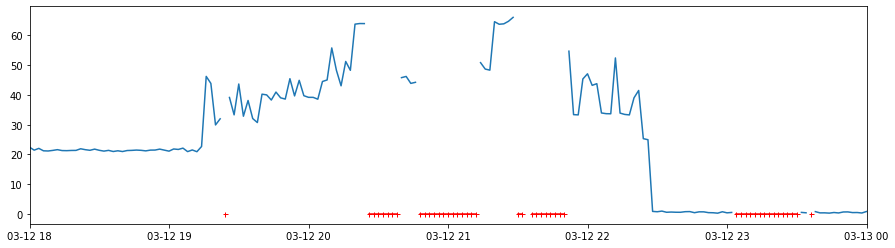

In [ ]:
startdt = dt.datetime.strptime('2021/03/12 18:00:00','%Y/%m/%d %H:%M:%S')
stopdt = dt.datetime.strptime('2021/03/13 00:00:00','%Y/%m/%d %H:%M:%S')
show.plot_gaps(pc['Pwr'], pc['Holes'], startdt, stopdt)

### 2. Filling small gaps (sizes bellow of 15 missing values)

In [ ]:
pc['Pwr'].interpolate(method='from_derivatives', inplace=True)

In [ ]:
last_gaps = f.find_holes(pc['Pwr'])
last_gaps_flat = f.flatten_holes_list(last_gaps)

In [ ]:
#clean Holes column
pc['Holes'] = np.NaN
pc['Holes'].loc[last_gaps_flat] = 0

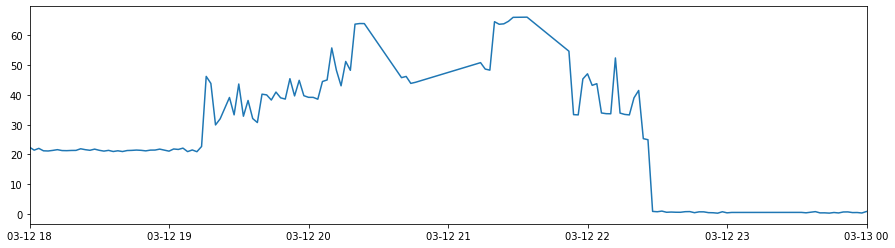

In [ ]:
startdt = dt.datetime.strptime('2021/03/12 18:00:00','%Y/%m/%d %H:%M:%S')
stopdt = dt.datetime.strptime('2021/03/13 00:00:00','%Y/%m/%d %H:%M:%S')
show.plot_gaps(pc['Pwr'], pc['Holes'], startdt, stopdt)